### Import

In [2]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import random
import matplotlib.image as mpimg
from glob import glob
import cv2
import numpy as np
import hashlib
from collections import defaultdict


In [3]:

# 데이터 경로
DATA_DIR = './data/train'

# 클래스 목록 가져오기
class_dirs = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
print(f"클래스 목록: {class_dirs}")
print(len(class_dirs), "클래스")

# 클래스별 이미지 경로 수집
data = []
for cls in class_dirs:
    cls_dir = os.path.join(DATA_DIR, cls)
    for img_name in os.listdir(cls_dir):
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(cls_dir, img_name)
            img_path = os.path.normpath(img_path)  # 경로 정규화
            data.append({
                'class': cls,
                'img_path': img_path
            })

df = pd.DataFrame(data)

클래스 목록: ['1시리즈_F20_2013_2015', '1시리즈_F20_2016_2019', '1시리즈_F40_2020_2024', '2008_2015_2017', '2시리즈_그란쿠페_F44_2020_2024', '2시리즈_액티브_투어러_F45_2019_2021', '2시리즈_액티브_투어러_U06_2022_2024', '3008_2세대_2018_2023', '3시리즈_E90_2005_2012', '3시리즈_F30_2013_2018', '3시리즈_G20_2019_2022', '3시리즈_G20_2023_2025', '3시리즈_GT_F34_2014_2021', '4시리즈_F32_2014_2020', '4시리즈_G22_2021_2023', '4시리즈_G22_2024_2025', '5008_2세대_2018_2019', '5008_2세대_2021_2024', '5시리즈_F10_2010_2016', '5시리즈_G30_2017_2023', '5시리즈_G60_2024_2025', '5시리즈_GT_F07_2010_2017', '6시리즈_F12_2011_2018', '6시리즈_GT_G32_2018_2020', '6시리즈_GT_G32_2021_2024', '718_박스터_2017_2024', '718_카이맨_2017_2024', '7시리즈_F01_2009_2015', '7시리즈_G11_2016_2018', '7시리즈_G11_2019_2022', '7시리즈_G70_2023_2025', '8시리즈_G15_2020_2024', '911_2003_2019', '911_992_2020_2024', 'A4_B9_2016_2019', 'A4_B9_2020_2024', 'A5_F5_2019_2024', 'A6_C8_2019_2025', 'A7_2012_2016', 'A7_4K_2020_2024', 'A8_D5_2018_2023', 'All_New_XJ_2016_2019', 'AMG_GT_2016_2024', 'A_클래스_W176_2015_2018', 'A_클래스_W177_2020_2025', 

In [10]:
# 윈도우용 기본 한글 폰트 설정 (나눔고딕이나 맑은 고딕 추천)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 'NanumGothic' 등
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

### 클래스별 이미지 개수 분포 확인

C:\Users\danyo\AppData\Local\Temp\ipykernel_3496\1991553595.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\danyo\miniconda3\envs\hecto\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


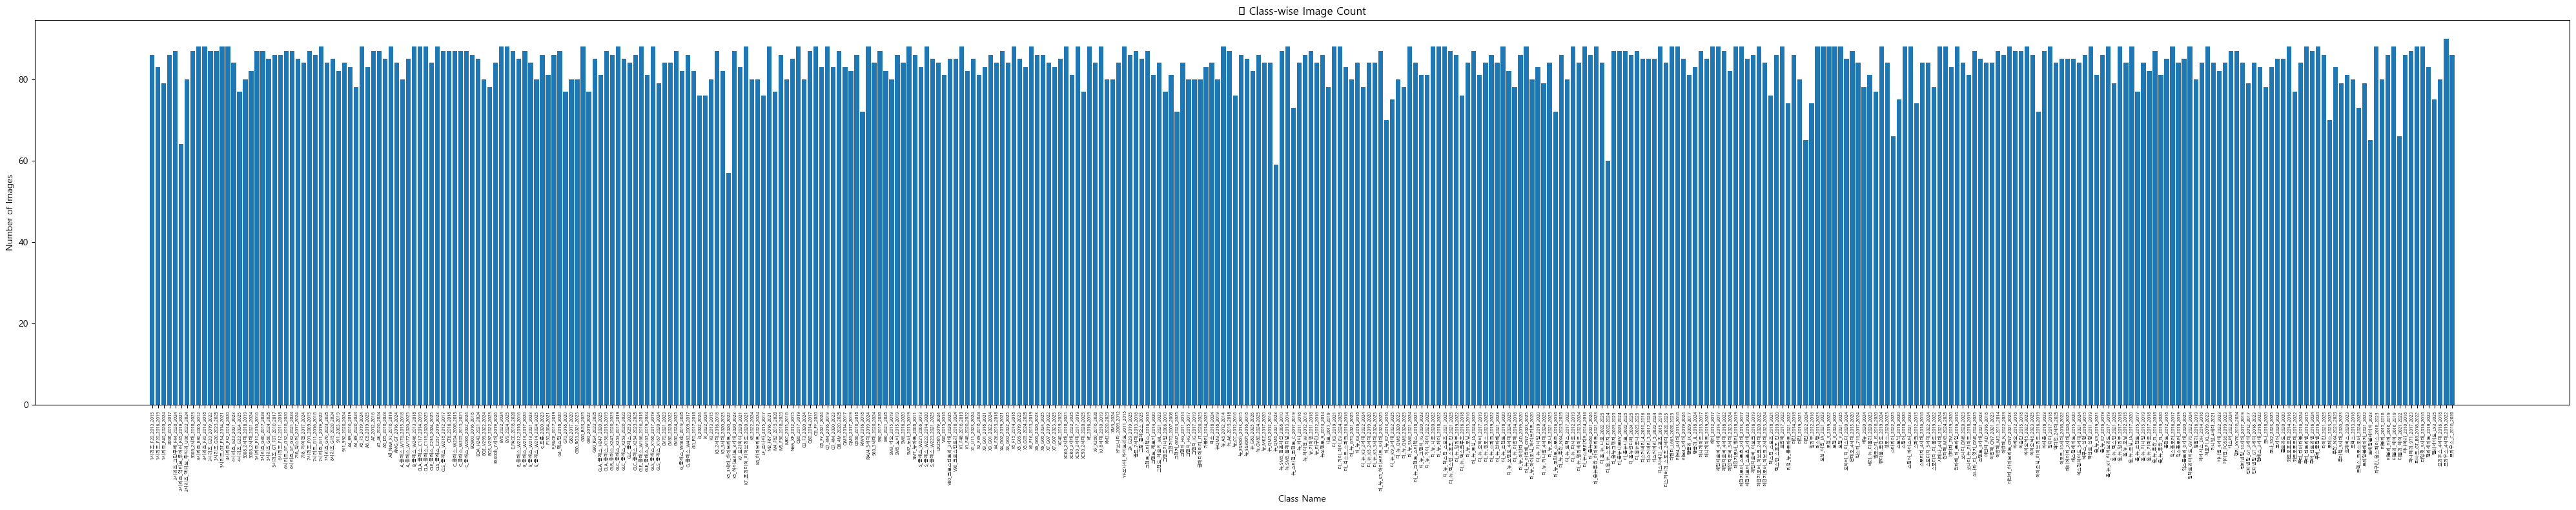

In [11]:
class_counts = {}
class_list = []

# 클래스명 기준으로 이미지 수 세기
for class_name in os.listdir(DATA_DIR):
    class_path = os.path.join(DATA_DIR, class_name)
    if os.path.isdir(class_path):
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        class_counts[class_name] = len(image_files)
        class_list.append(class_name)

# 클래스명 기준으로 순서 유지
class_names = list(class_counts.keys())
image_counts = [class_counts[class_name] for class_name in class_names]

# 막대 그래프 시각화
plt.figure(figsize=(40, 8))
plt.bar(class_names, image_counts)
plt.title("📊 Class-wise Image Count")
plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.xticks(rotation=90, fontsize=5)
plt.tight_layout()
plt.show()

### 이미지 해상도 분포 확인 

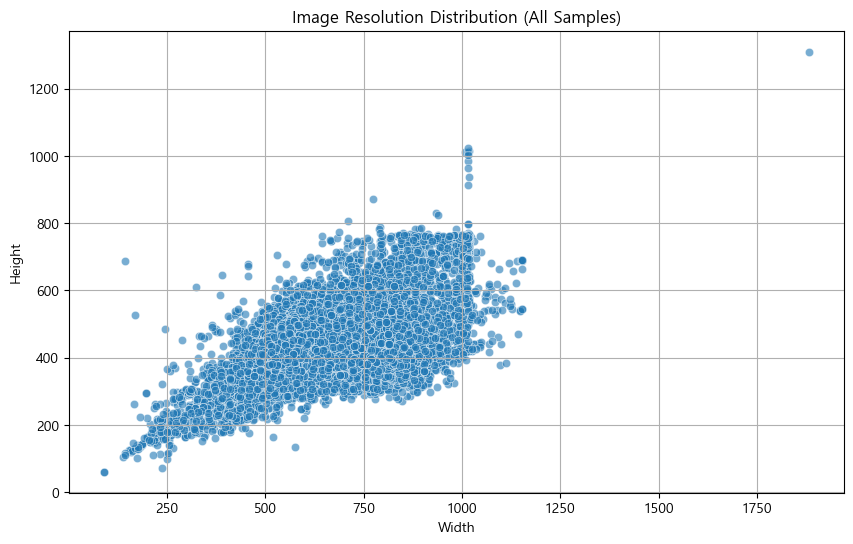

In [20]:
sampled_paths = df['img_path'].sample(n=min(500, len(df)), random_state=42)
dims = []

for path in df['img_path']:
    try:
        img = Image.open(path)
        dims.append(img.size)  # (width, height)
    except:
        continue

dim_df = pd.DataFrame(dims, columns=['width', 'height'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='width', y='height', data=dim_df, alpha=0.6)
plt.title("Image Resolution Distribution (All Samples)")
plt.xlabel("Width")
plt.ylabel("Height")
plt.grid(True)
plt.show()

### 이미지 가로세로 비율 분포

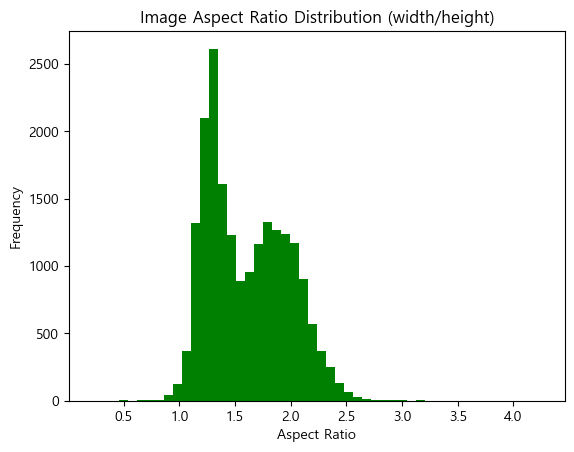

In [51]:
sample_per_class = 50

ratios = []
for cls in class_names:
    sample_df = df[df['class'] == cls].sample(min(sample_per_class, len(df[df['class'] == cls])))
    for img_path in sample_df['img_path']:
        img = Image.open(img_path)
        w, h = img.size
        ratio = w / h
        ratios.append(ratio)
plt.hist(ratios, bins=50, color='green')
plt.title('Image Aspect Ratio Distribution (width/height)')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.show()

### 이미지 밝기 분포 확인

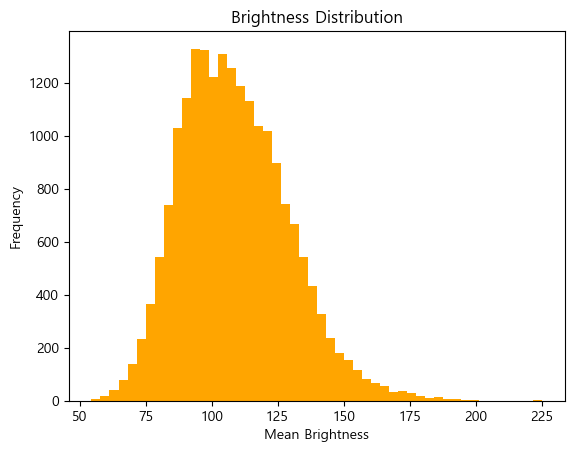

In [49]:
sample_per_class = 50

brightness_list = []
for cls in class_names:
    sample_df = df[df['class'] == cls].sample(min(sample_per_class, len(df[df['class'] == cls])))
    for img_path in sample_df['img_path']:
        img = Image.open(img_path).convert('L')  # 흑백
        img_np = np.array(img)
        mean_brightness = img_np.mean()
        brightness_list.append(mean_brightness)
plt.hist(brightness_list, bins=50, color='orange')
plt.title('Brightness Distribution')
plt.xlabel('Mean Brightness')
plt.ylabel('Frequency')
plt.show()

### Blur 정도 분석

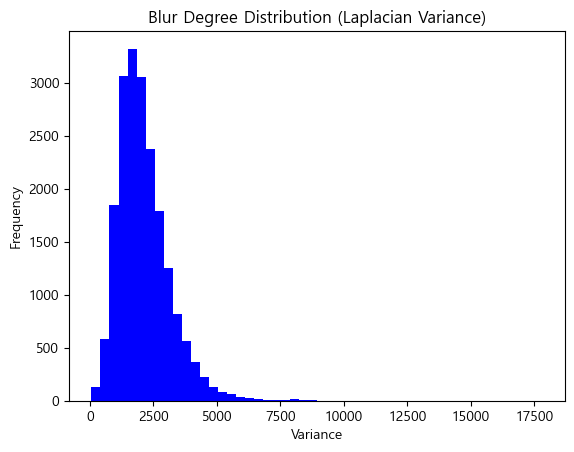

In [50]:
sample_per_class = 50

blur_vals = []
for cls in class_names:
    sample_df = df[df['class'] == cls].sample(min(sample_per_class, len(df[df['class'] == cls])))
    for img_path in sample_df['img_path']:
        img = Image.open(img_path).convert('L')
        img_np = np.array(img)
        lap = cv2.Laplacian(img_np, cv2.CV_64F)
        var_lap = lap.var()
        blur_vals.append(var_lap)
plt.hist(blur_vals, bins=50, color='blue')
plt.title('Blur Degree Distribution (Laplacian Variance)')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

### 중복 이미지 체크

In [ ]:
# 해시별 이미지 경로 저장용 딕셔너리
hash_to_paths = defaultdict(list)

# 모든 이미지 경로에 대해 MD5 해시 계산 후 딕셔너리에 추가
for img_path in df['img_path']:
    with open(img_path, 'rb') as f:
        img_hash = hashlib.md5(f.read()).hexdigest()
    hash_to_paths[img_hash].append(img_path)

# 중복 이미지만 필터링 (해시당 2개 이상인 경우)
duplicates = {h: paths for h, paths in hash_to_paths.items() if len(paths) > 1}

# 중복 이미지 해시와 해당 이미지 파일 경로 출력
print(f"총 중복 해시 개수: {len(duplicates)}")
for h, paths in duplicates.items():
    print(f"해시: {h}, 중복 개수: {len(paths)}")
    for p in paths:
        print(f" - {p}")
    print()


#### 폴더명이 다른 중복 이미지 체크

In [ ]:
hash_to_paths = defaultdict(list)

for img_path in df['img_path']:
    with open(img_path, 'rb') as f:
        img_hash = hashlib.md5(f.read()).hexdigest()
    hash_to_paths[img_hash].append(img_path)

# 중복 이미지 중 폴더명이 다른 경우만 필터링
duplicates_diff_folder = {}

for h, paths in hash_to_paths.items():
    if len(paths) > 1:
        # 각 이미지의 클래스 폴더명 추출
        folders = set(os.path.normpath(p).split(os.sep)[-2] for p in paths)
        if len(folders) > 1:
            duplicates_diff_folder[h] = paths

print(f"폴더명이 다른 중복 이미지 해시 개수: {len(duplicates_diff_folder)}")
for h, paths in duplicates_diff_folder.items():
    print(f"해시: {h}, 중복 개수: {len(paths)}")
    for p in paths:
        print(f" - {p}")
    print()


폴더명이 다른 중복 이미지 해시 개수: 0


### 이미지 샘플 랜덤 출력

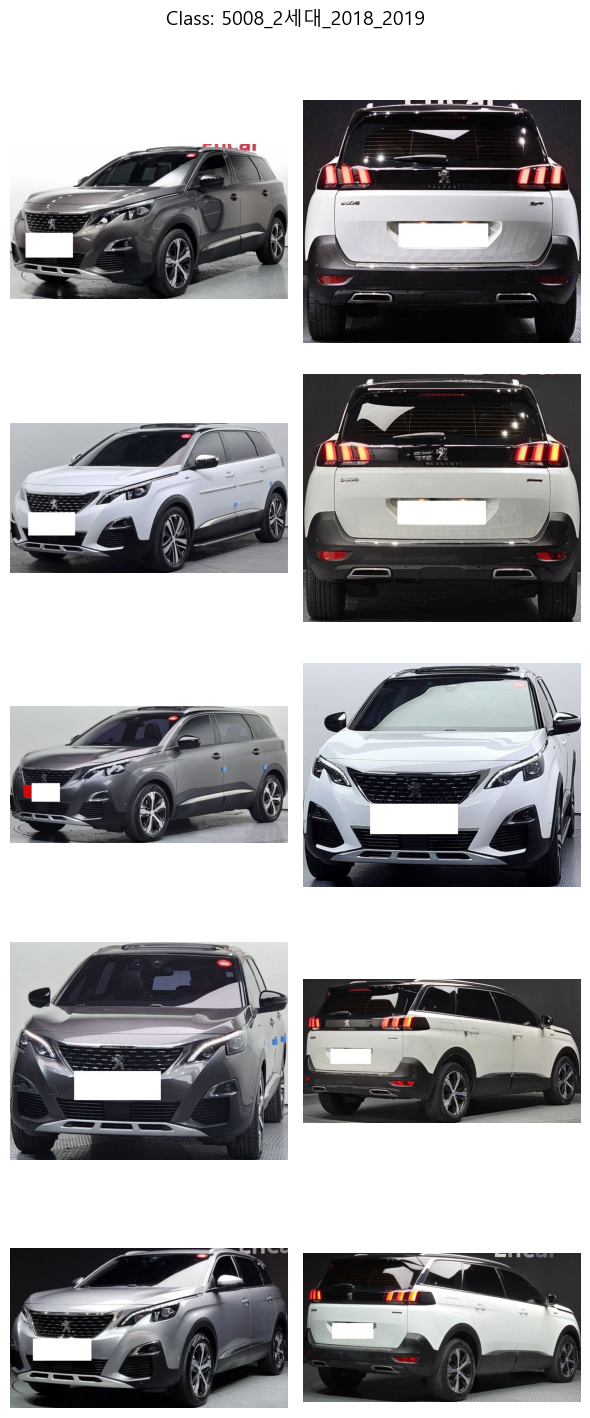

In [22]:
NUM_IMAGES_PER_CLASS = 10
NUM_CLASSES_TO_DISPLAY = 1  # 랜덤으로 뽑을 클래스 개수
IMAGES_PER_ROW = 2
IMAGES_PER_COL = NUM_IMAGES_PER_CLASS // IMAGES_PER_ROW

# 랜덤 시드 고정 (필요 시 주석 처리 가능)
# random.seed(42)

# 전체 클래스 리스트
all_classes = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]

# 랜덤으로 클래스 뽑기
selected_classes = random.sample(all_classes, NUM_CLASSES_TO_DISPLAY)

for class_name in selected_classes:
    class_path = os.path.join(DATA_DIR, class_name)
    image_files = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    # 클래스 내 이미지도 랜덤으로 10장 뽑기 (이미지 수가 10장 이하라면 전부)
    if len(image_files) >= NUM_IMAGES_PER_CLASS:
        selected_images = random.sample(image_files, NUM_IMAGES_PER_CLASS)
    else:
        selected_images = image_files
    
    # 시각화
    fig, axes = plt.subplots(IMAGES_PER_COL, IMAGES_PER_ROW, figsize=(6, 15))
    fig.suptitle(f'Class: {class_name}', fontsize=14)
    
    for idx, img_path in enumerate(selected_images):
        row = idx % IMAGES_PER_COL
        col = idx // IMAGES_PER_COL
        ax = axes[row, col]
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.axis('off')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
